In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



In [47]:
# Load the dataset
df = pd.read_csv("../data/benin-malanville.csv")

In [48]:

print("Dataset Shape:", df.shape)

print("Columns:", df.columns)

print("Missing Values per Column:")
print(df.isna().sum())

Dataset Shape: (525600, 19)
Columns: Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')
Missing Values per Column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [49]:
# Summary Statistics & Missing-Value Report
print("Summary Statistics & Missing-Value Report:")
print()
# Overview of numeric columns
print("The description of the numeric columns:")
df.describe()

Summary Statistics & Missing-Value Report:

The description of the numeric columns:


GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.471736       NaN  
std        12.348743       NaN  
min         8.100000       NaN  
25%        23.600000       NaN  
50%        28.900000       NaN  
75%        41.500000       NaN  
max        72.500000       NaN

In [50]:
print(df.isna().sum())

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [51]:
# Check for missing values in all columns
missing_values = df.isna().sum()
print("Missing Values per Column:")
print(missing_values)

# Identify columns with significant missing data (>5%)
threshold = len(df) * 0.05  # 5% threshold
columns_with_missing = missing_values[missing_values > threshold]
print("\nColumns with >5% Missing Values:")
print(columns_with_missing)

Missing Values per Column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Columns with >5% Missing Values:
Comments    525600
dtype: int64


In [52]:
# Outlier Detection & Basic Cleaning
print("Outlier Detection & Basic Cleaning:")

# Define the columns to check for outliers
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores and flag outliers (|Z| > 3)
z_scores = np.abs(stats.zscore(df[key_columns]))

# Flag rows with any |Z| > 3
outlier_mask = (z_scores > 3).any(axis=1)

# Show number of outliers
print(f"Number of outlier rows: {outlier_mask.sum()}")


Outlier Detection & Basic Cleaning:
Number of outlier rows: 7740


In [53]:
# drop outliers
print("Dropping outliers...")
df = df[~outlier_mask]

Dropping outliers...


In [54]:
# normalize the negative data to zero

# checking the rows with invalid values (irradiance targeted)
irradiance_cols = ["GHI", "DNI", "DHI", "ModA", "ModB"]

for col in irradiance_cols:
    invalid_count = (df[col] < 0).sum()
    print(f"{col}: {invalid_count} invalid values (< 0)")

print("Normalizing negative values to zero...")
# For each column, if the value is negative, we will
# change them to zero
for col in irradiance_cols:
    df[col] = df[col].clip(lower=0)

GHI: 256963 invalid values (< 0)
DNI: 274469 invalid values (< 0)
DHI: 257300 invalid values (< 0)
ModA: 0 invalid values (< 0)
ModB: 0 invalid values (< 0)
Normalizing negative values to zero...


In [55]:
# save the cleaned data
print("Saving the cleaned data...")
country = "benin"  # change accordingly
output_path = f"../data/benin-malamville_clean_clean.csv"
df.to_csv(output_path, index=False)
print(f"Cleaned data exported to: {output_path}")

Saving the cleaned data...
Cleaned data exported to: ../data/benin-malamville_clean_clean.csv


In [56]:
# Time Series Analysis
print("Time Series Analysis:")

# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M')

# Set 'Timestamp' as index
df.set_index('Timestamp', inplace=True)

Time Series Analysis:


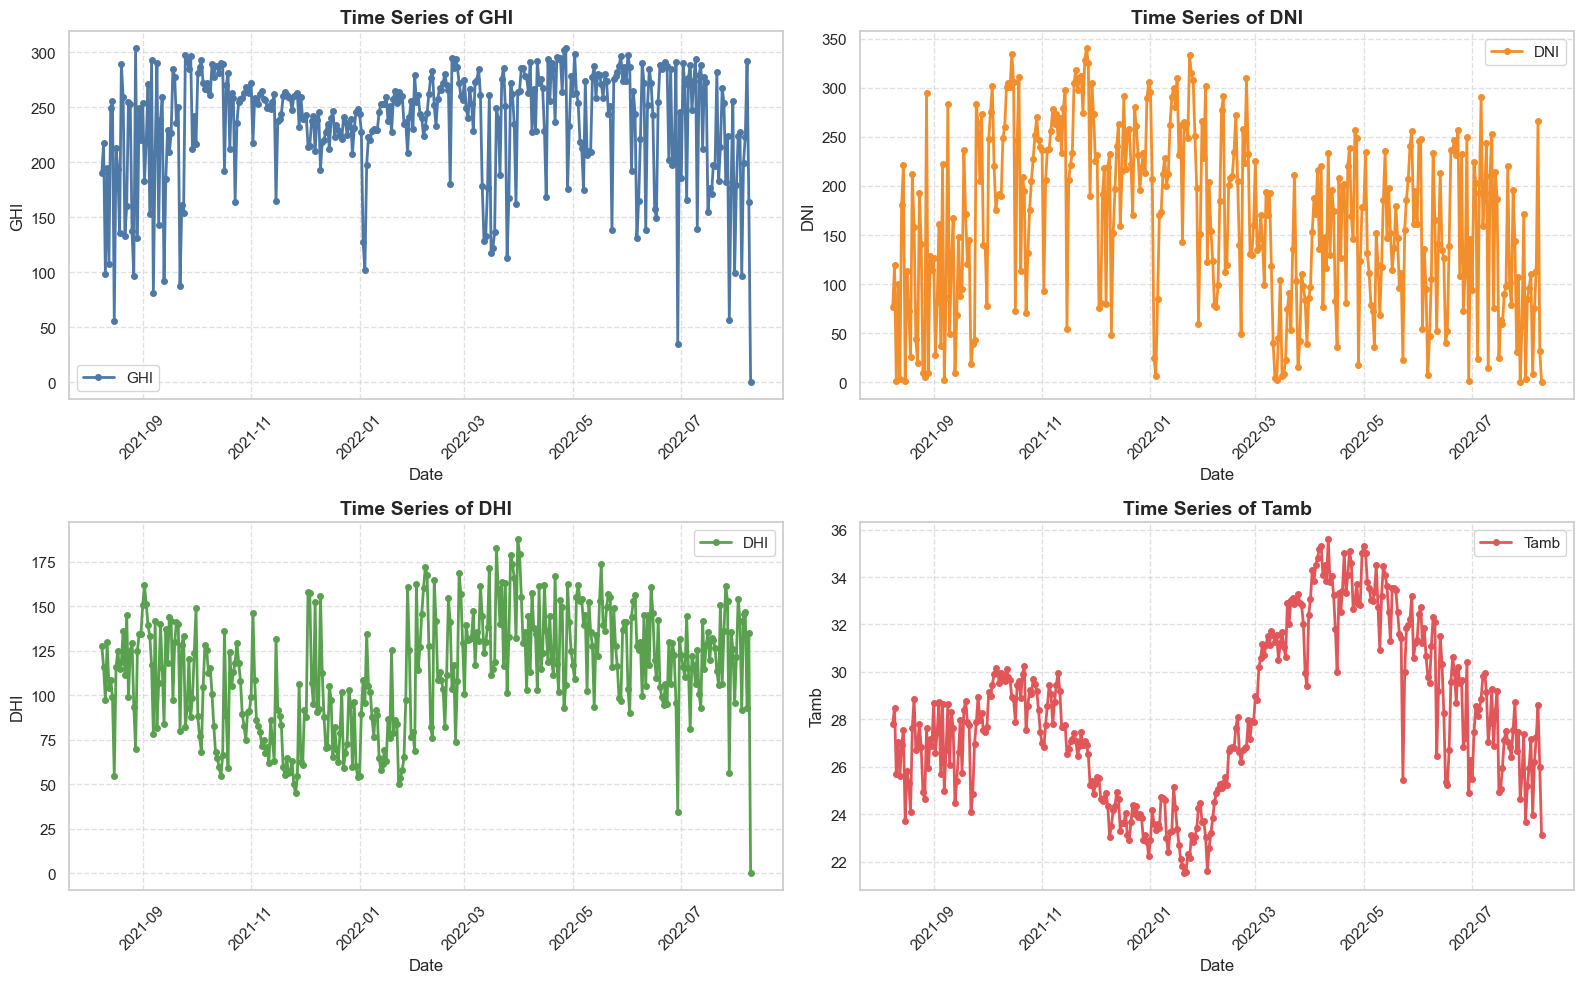

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn style for a cleaner look
sns.set_style("whitegrid")

# Define the columns to plot
columns = ['GHI', 'DNI', 'DHI', 'Tamb']

# New aesthetically pleasing color palette
colors = ['#4E79A7', '#F28E2B', '#59A14F', '#E15759']

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()

# Daily average sample
sampled_df = df.resample('D').mean().ffill()

# Plot each column in a separate subplot
for i in range(len(columns)):
    col = columns[i]
    axs[i].plot(sampled_df.index, sampled_df[col], 
                label=col, color=colors[i], marker='o', markersize=4, linewidth=2)
    axs[i].set_title(f'Time Series of {col}', fontsize=14, fontweight='bold')
    axs[i].set_xlabel('Date', fontsize=12)
    axs[i].set_ylabel(col, fontsize=12)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend()
    axs[i].grid(True, linestyle='--', alpha=0.6)

# Adjust layout spacing
plt.tight_layout()
plt.show()


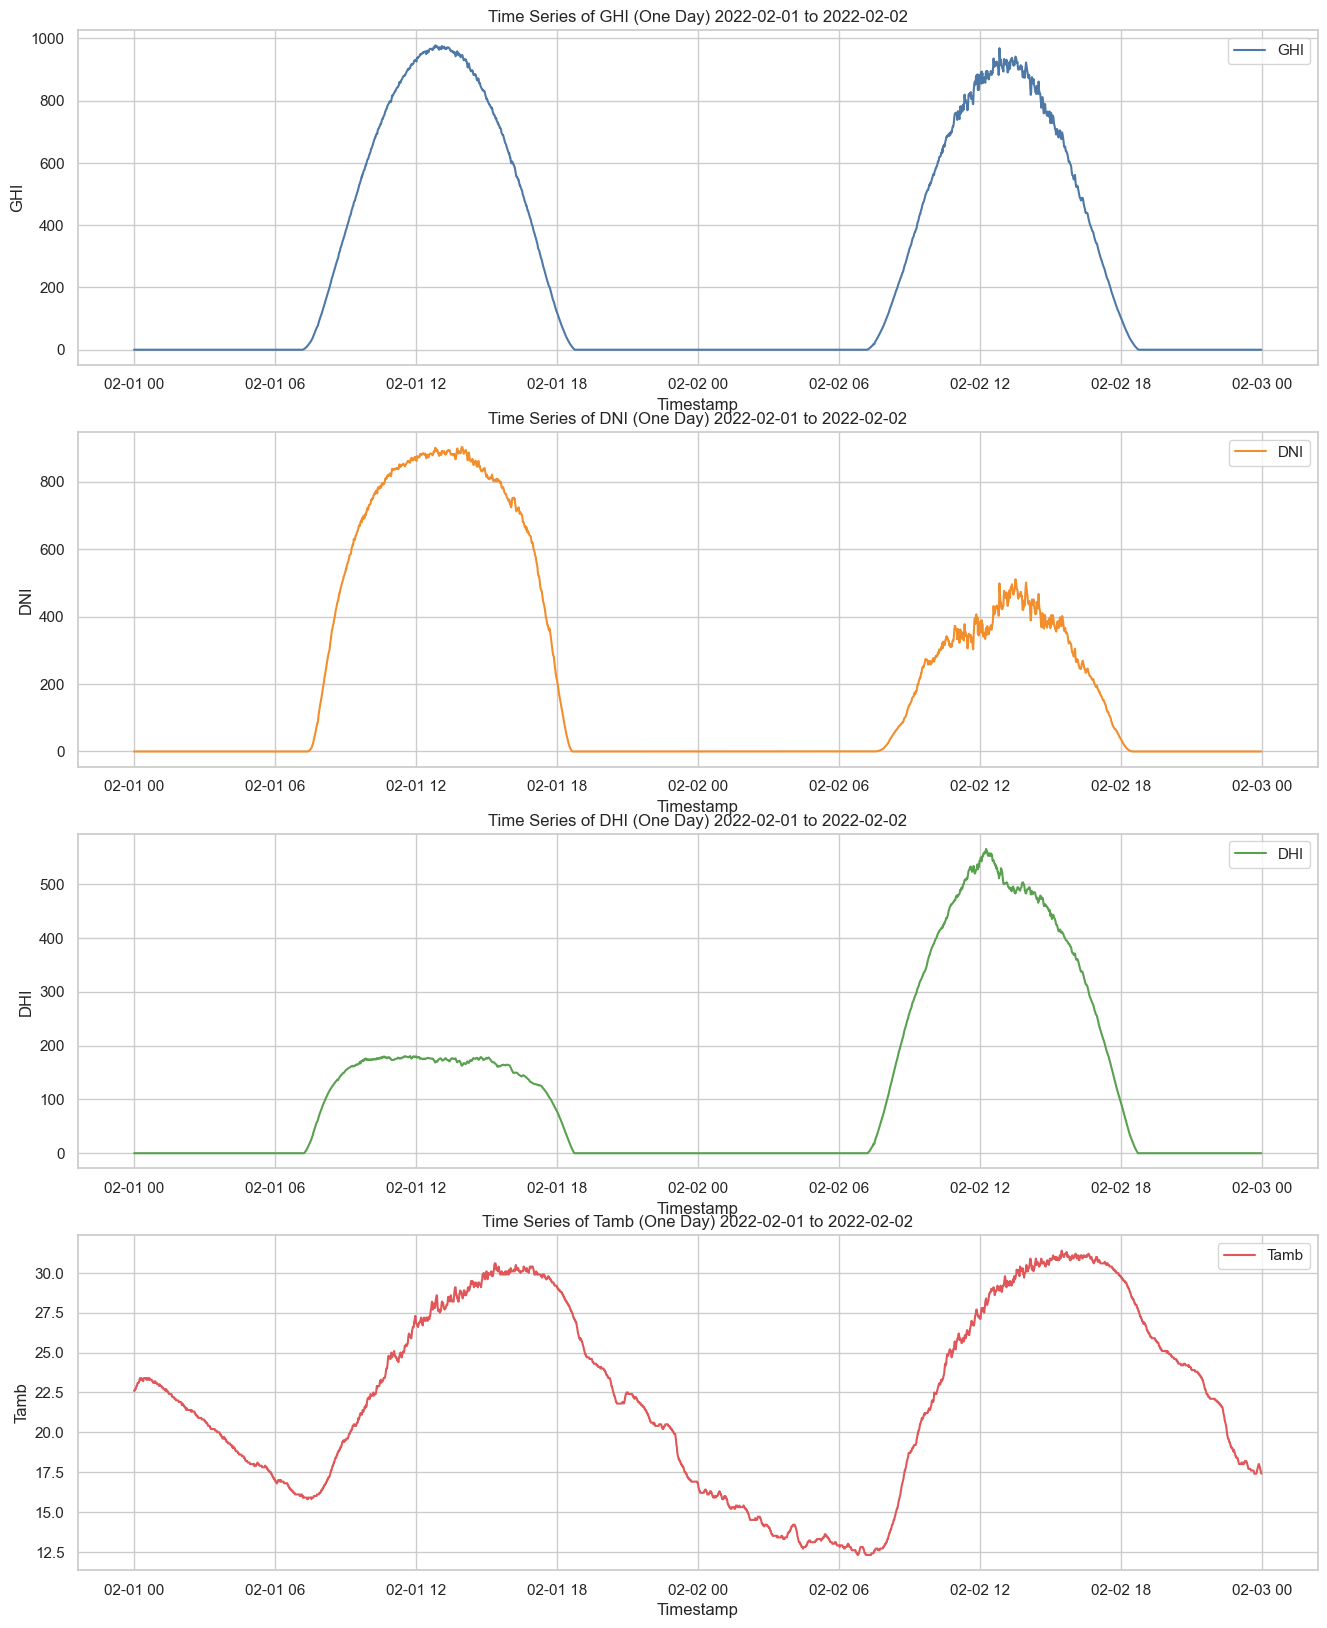

In [58]:
# one day of data
one_day = df.loc['2022-02-01':'2022-02-02']
fig, axs = plt.subplots(4, 1, figsize=(16, 20))
axs = axs.flatten()  # Flatten to loop easily
# Plot each column in a separate plot
for i in range(len(columns)):
    col = columns[i]
    axs[i].plot(one_day.index, one_day[col], label=col, color=colors[columns.index(col)])
    axs[i].set_title(f'Time Series of {col} (One Day) 2022-02-01 to 2022-02-02')
    axs[i].set_xlabel('Timestamp')
    axs[i].set_ylabel(col)
    axs[i].grid(True)
    axs[i].legend()


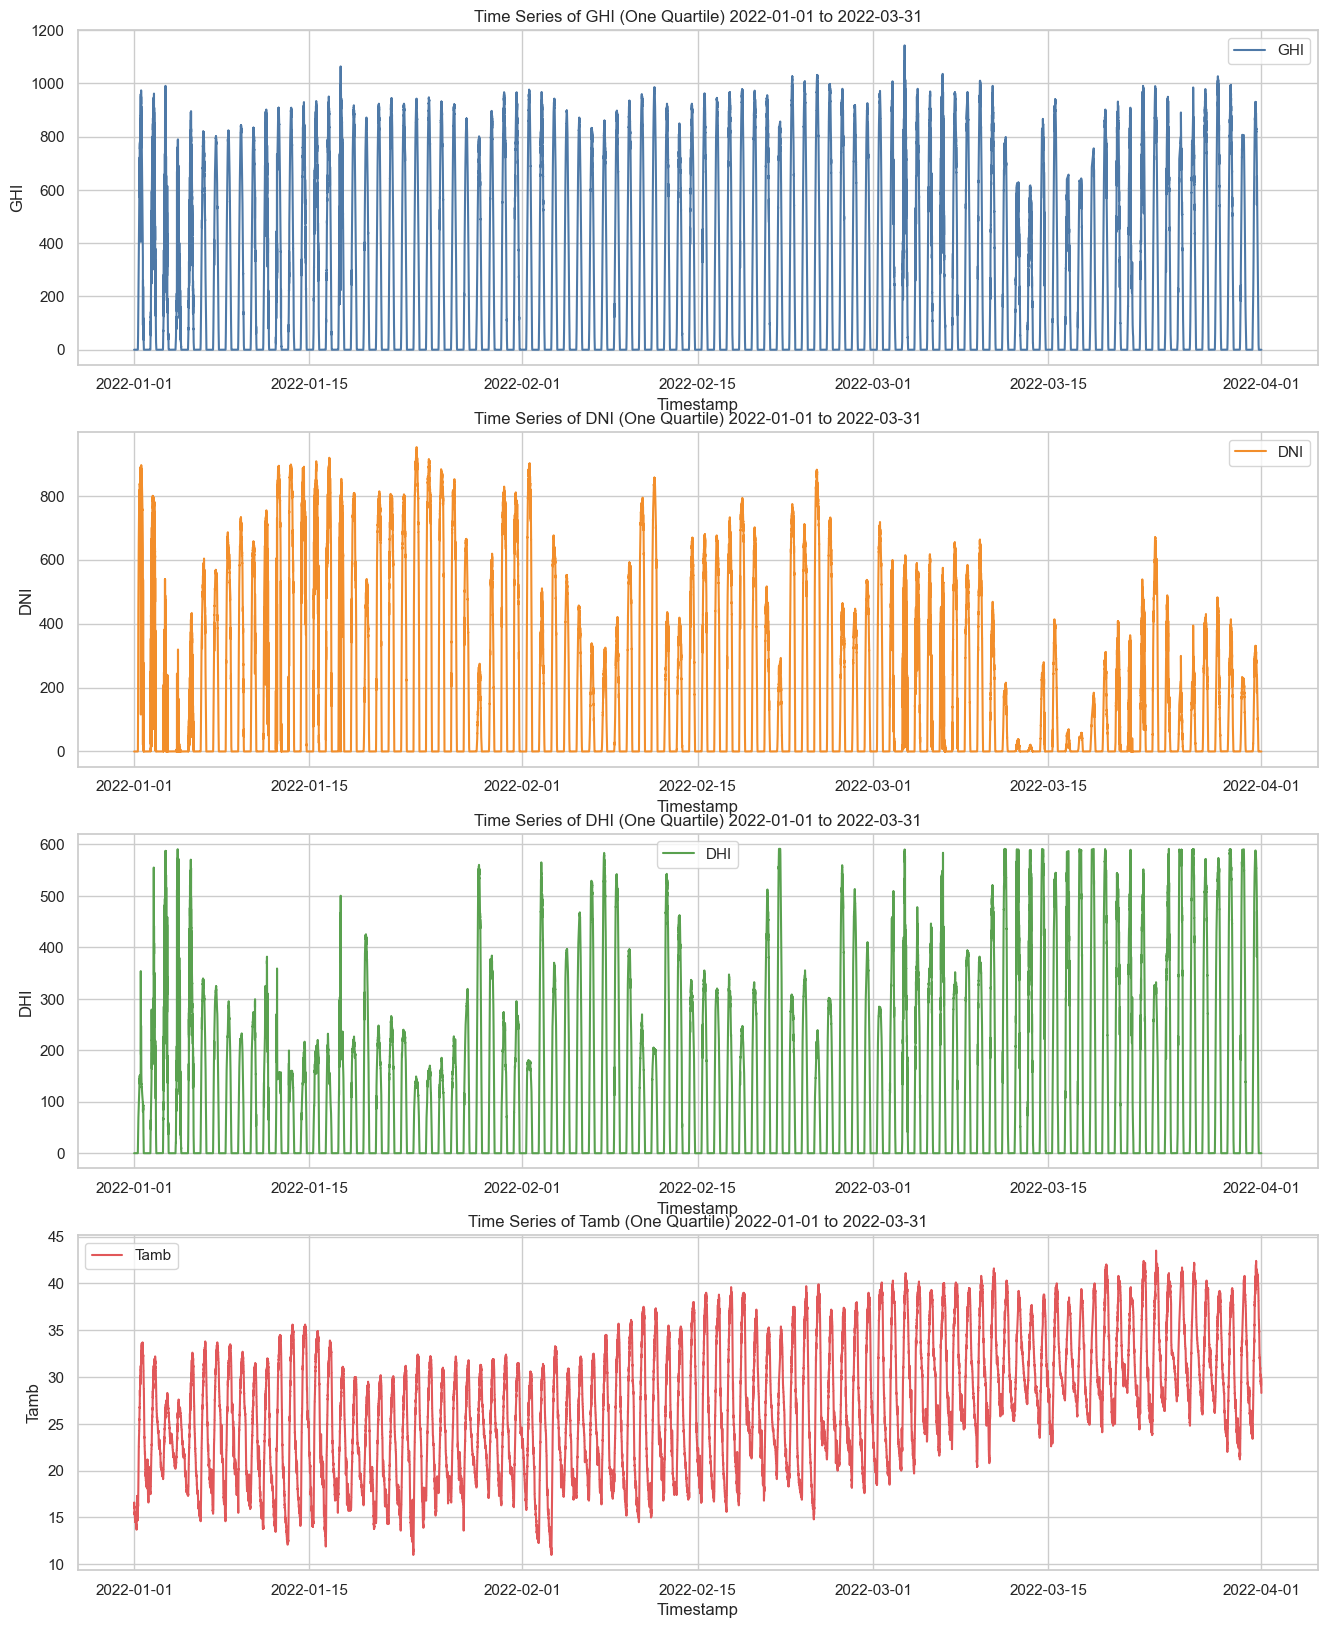

In [59]:
#one quartile year
one_quartile = df.loc['2022-01-01':'2022-03-31']
fig, axs = plt.subplots(4, 1, figsize=(16, 20))
axs = axs.flatten()  # Flatten to loop easily
# Plot each column in a separate plot
for i in range(len(columns)):
    col = columns[i]
    axs[i].plot(one_quartile.index, one_quartile[col], label=col, color=colors[columns.index(col)])
    axs[i].set_title(f'Time Series of {col} (One Quartile) 2022-01-01 to 2022-03-31')
    axs[i].set_xlabel('Timestamp')
    axs[i].set_ylabel(col)
    axs[i].grid(True)
    axs[i].legend()

Average ModA and ModB by Cleaning Status:
                ModA       ModB
Cleaning                       
0         232.323881  224.95509
1         306.610124  301.45000


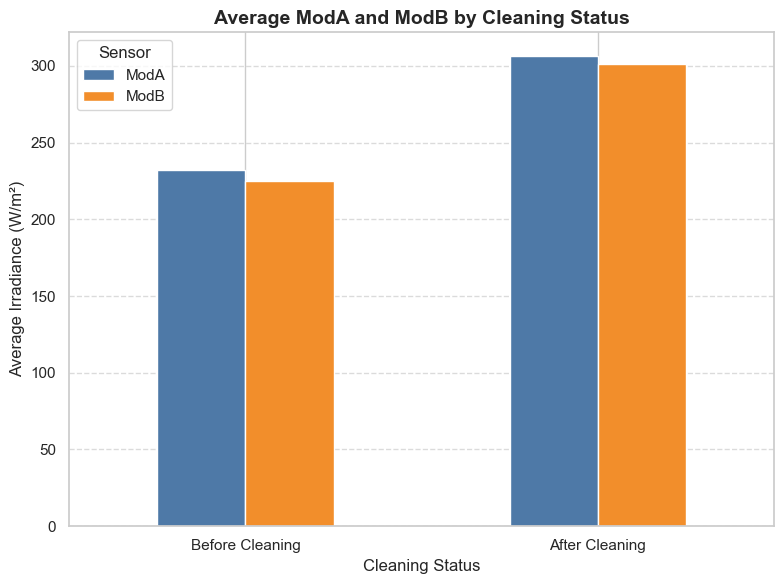

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn style for a modern look
sns.set_style("whitegrid")

# Group by 'Cleaning' and compute mean for ModA and ModB
mod_means = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Print the means
print("Average ModA and ModB by Cleaning Status:")
print(mod_means)

# Plot the bar chart
mod_means.plot(kind='bar', 
               figsize=(8, 6), 
               color=['#4E79A7', '#F28E2B'])

plt.title('Average ModA and ModB by Cleaning Status', fontsize=14, fontweight='bold')
plt.xlabel('Cleaning Status', fontsize=12)
plt.ylabel('Average Irradiance (W/m²)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Before Cleaning', 'After Cleaning'], rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Sensor', fontsize=11, title_fontsize=12)
plt.tight_layout()
plt.show()


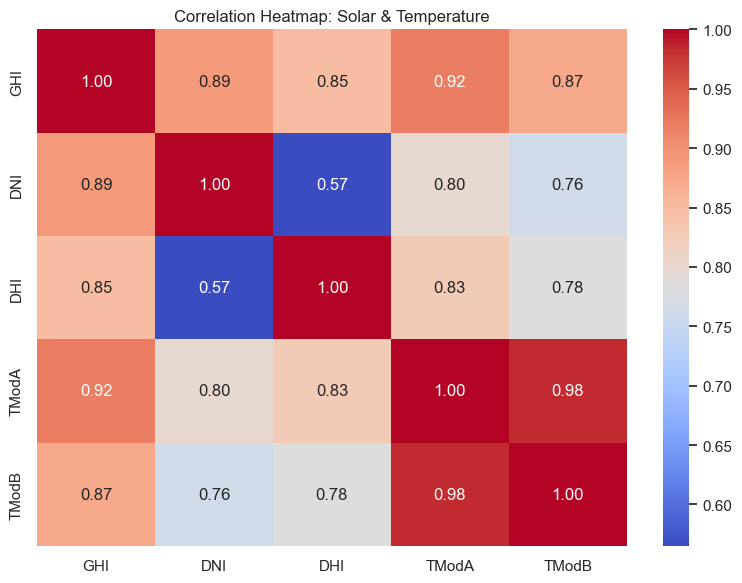

In [61]:
# Select relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Solar & Temperature')
plt.tight_layout()
plt.show()


Scatter Plots of selected pairs:


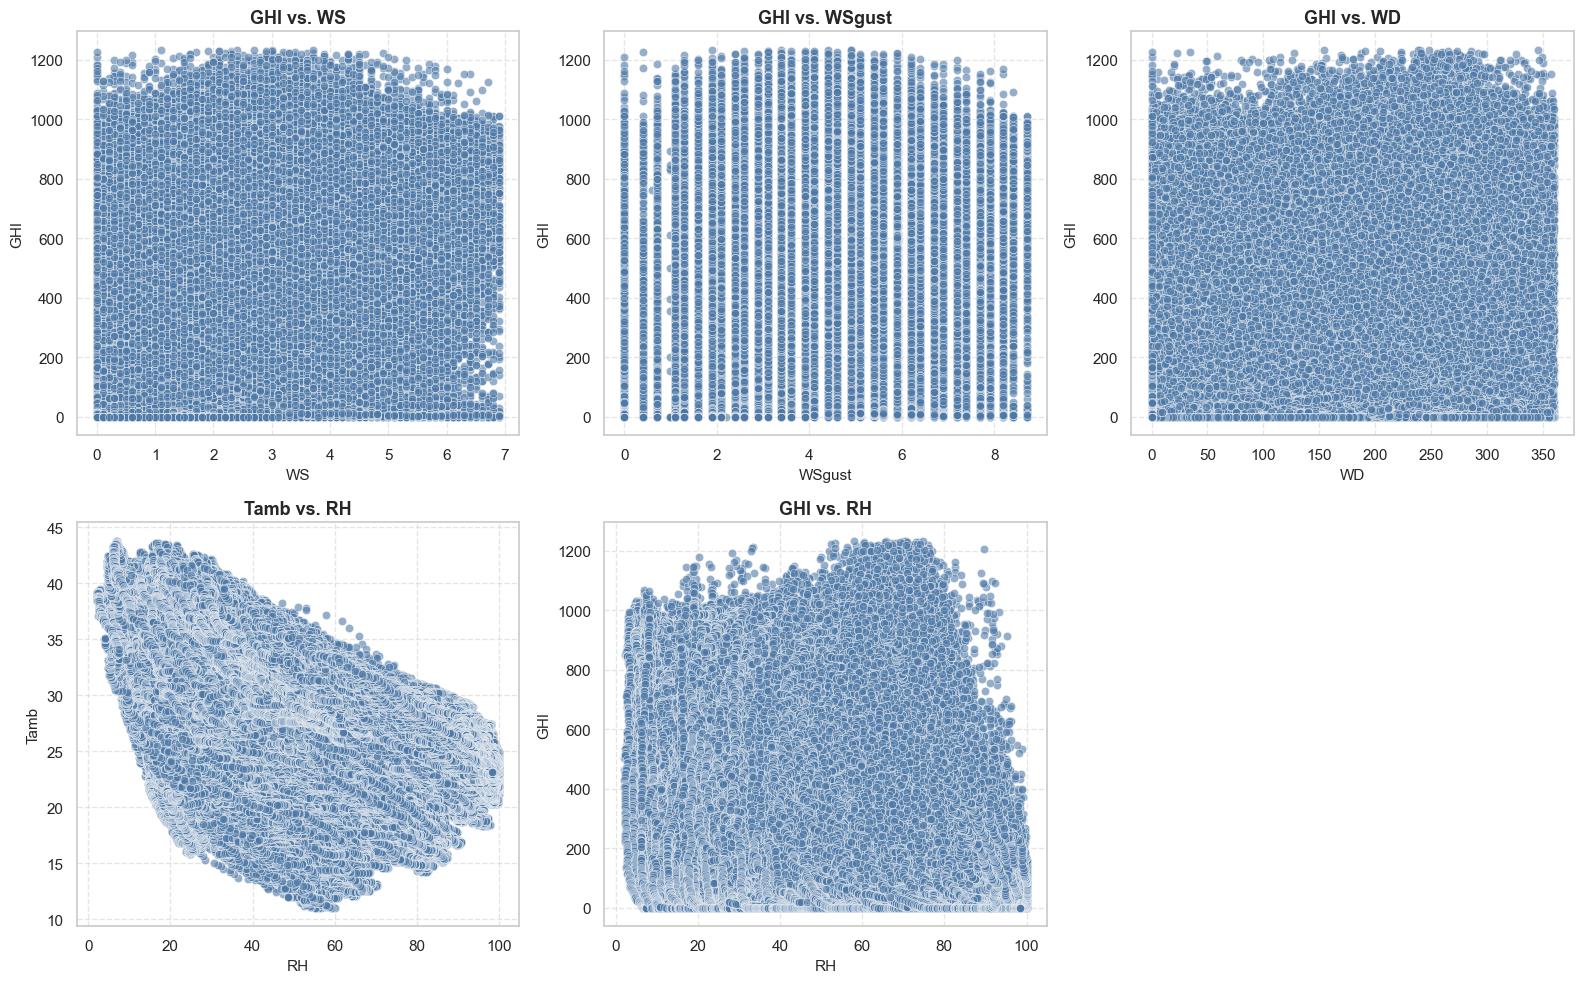

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

print("Scatter Plots of selected pairs:")

# Define pairs of columns to scatter plot
scatter_pairs = [
    ('WS', 'GHI'),
    ('WSgust', 'GHI'),
    ('WD', 'GHI'),
    ('RH', 'Tamb'),
    ('RH', 'GHI')
]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# Plot each scatter pair
for i, (x, y) in enumerate(scatter_pairs):
    sns.scatterplot(data=df, x=x, y=y, ax=axes[i],
                    color="#4E79A7", edgecolor="w", alpha=0.6)
    axes[i].set_title(f'{y} vs. {x}', fontsize=13, fontweight='bold')
    axes[i].set_xlabel(x, fontsize=11)
    axes[i].set_ylabel(y, fontsize=11)
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Hide any unused axes
for j in range(len(scatter_pairs), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


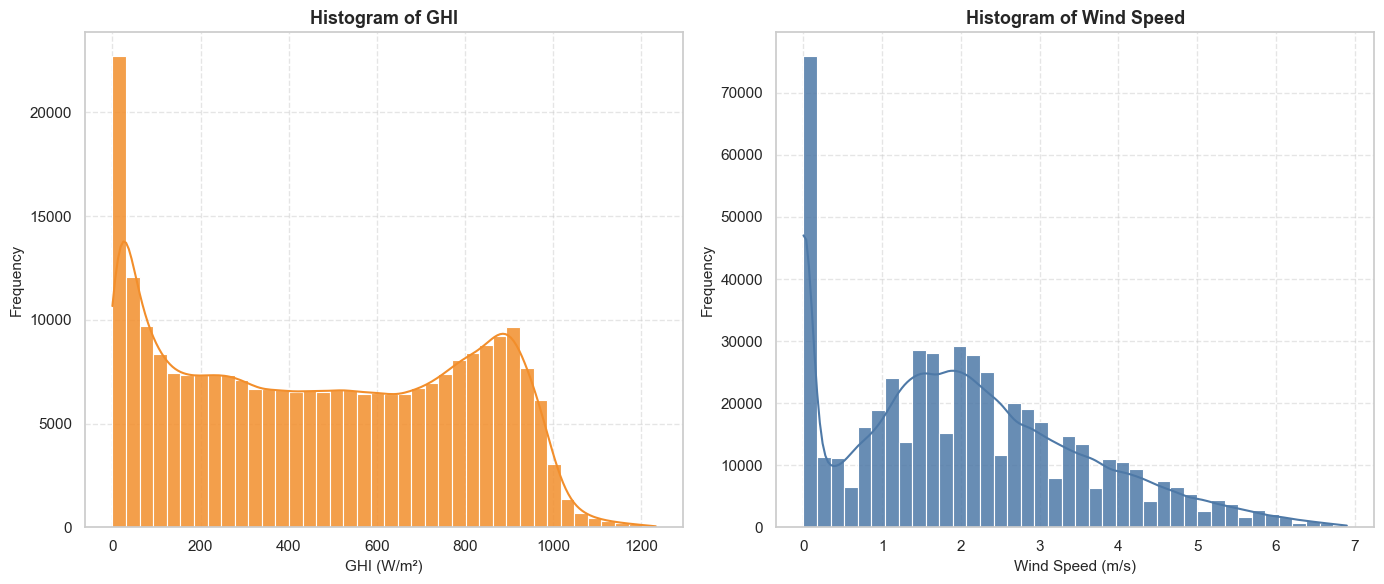

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Seaborn styling
sns.set_style("whitegrid")

# Prepare the data
curated_ghi = df['GHI'].replace(0, np.nan).dropna()

# Set up figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram of GHI
sns.histplot(curated_ghi, bins=40, kde=True, ax=axes[0],
             color='#F28E2B', edgecolor='white', alpha=0.85)
axes[0].set_title("Histogram of GHI", fontsize=13, fontweight='bold')
axes[0].set_xlabel("GHI (W/m²)", fontsize=11)
axes[0].set_ylabel("Frequency", fontsize=11)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Histogram of Wind Speed
sns.histplot(df['WS'], bins=40, kde=True, ax=axes[1],
             color='#4E79A7', edgecolor='white', alpha=0.85)
axes[1].set_title("Histogram of Wind Speed", fontsize=13, fontweight='bold')
axes[1].set_xlabel("Wind Speed (m/s)", fontsize=11)
axes[1].set_ylabel("Frequency", fontsize=11)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Layout adjustment
plt.tight_layout()
plt.show()


Windrose plot for wind speed and direction:


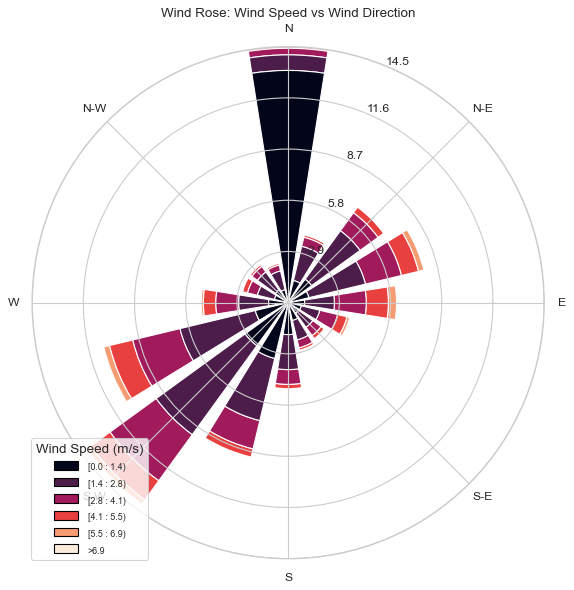

In [64]:
# windrose plot for wind speed and direction
print("Windrose plot for wind speed and direction:")

from windrose import WindroseAxes
# Create Windrose plot
wind_data = df[['WS', 'WD']]
ax = WindroseAxes.from_ax()
ax.bar(wind_data['WD'], wind_data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Wind Speed (m/s)")
plt.title("Wind Rose: Wind Speed vs Wind Direction")
plt.show()


Effect of RH on Temperature and GHI:


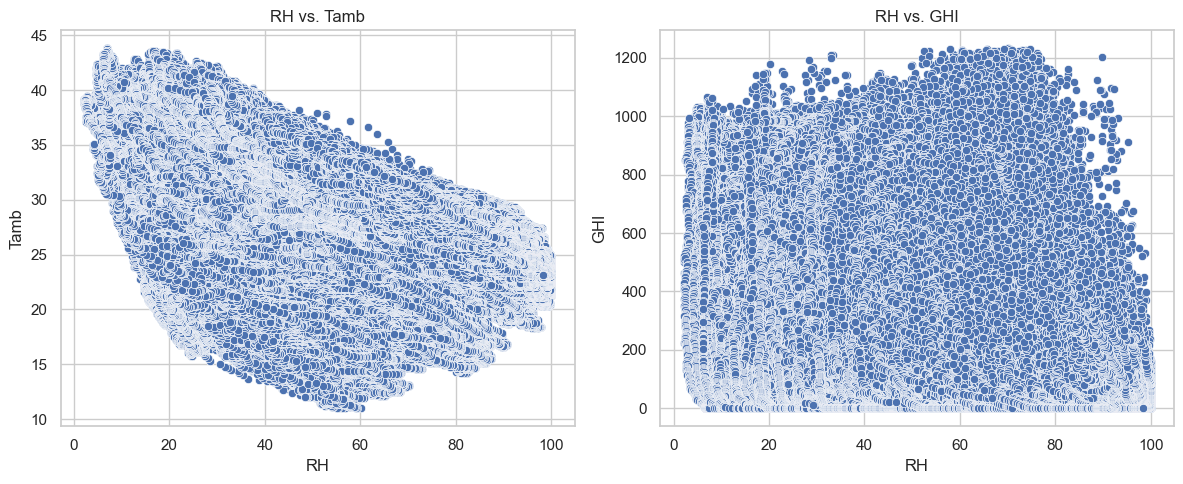

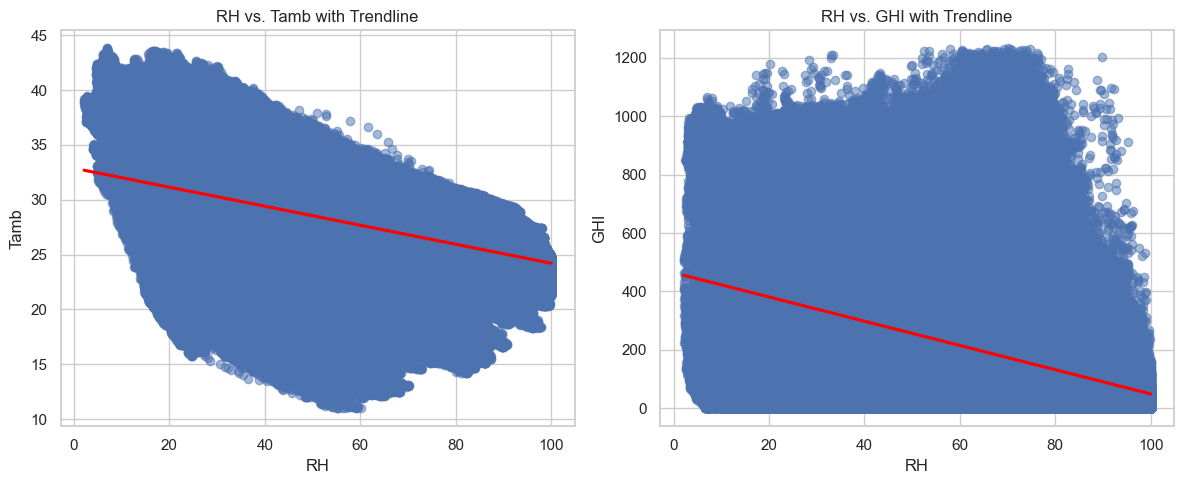

In [65]:
# Effect of RH on Temperature and GHI
print("Effect of RH on Temperature and GHI:")

# Scatter plots of RH vs Tamb and GHI
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x='RH', y='Tamb', data=df, ax=axs[0])
axs[0].set_title('RH vs. Tamb')

sns.scatterplot(x='RH', y='GHI', data=df, ax=axs[1])
axs[1].set_title('RH vs. GHI')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# trendline for RH vs Tamb
sns.regplot(x='RH', y='Tamb', data=df, ax=axs[0], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[0].set_title('RH vs. Tamb with Trendline')

# trendline for RH vs GHI
sns.regplot(x='RH', y='GHI', data=df, ax=axs[1], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[1].set_title('RH vs. GHI with Trendline')

plt.tight_layout()
plt.show()


Bubble chart of GHI vs Tamb with bubble size as RH:


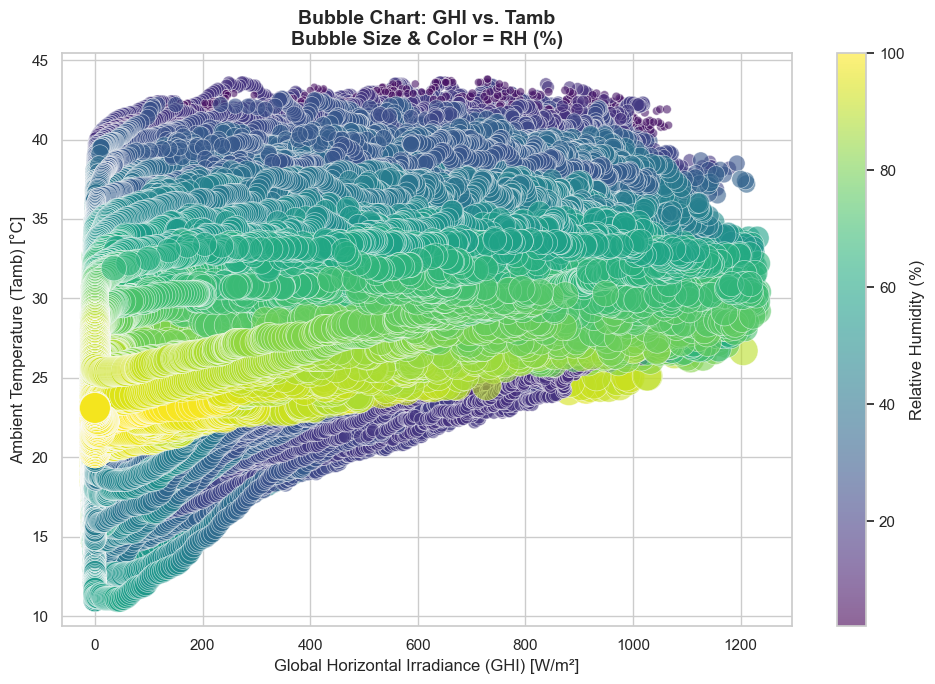

In [66]:
import matplotlib.pyplot as plt

print("Bubble chart of GHI vs Tamb with bubble size as RH:")

plt.figure(figsize=(10, 7))

# Choose bubble size variable: RH (Relative Humidity)
bubble_size = df['RH']

# Scale bubble sizes for better visualization
sizes = (bubble_size / bubble_size.max()) * 500  # Multiplier adjusted for visibility

# Create scatter (bubble) plot
scatter = plt.scatter(
    df['GHI'], df['Tamb'], 
    s=sizes, 
    c=bubble_size, 
    cmap='viridis', 
    alpha=0.6, 
    edgecolors='white', 
    linewidths=0.5
)

# Add colorbar to show RH mapping
cbar = plt.colorbar(scatter)
cbar.set_label('Relative Humidity (%)')

# Titles and labels
plt.title('Bubble Chart: GHI vs. Tamb\nBubble Size & Color = RH (%)', fontsize=14, fontweight='bold')
plt.xlabel('Global Horizontal Irradiance (GHI) [W/m²]')
plt.ylabel('Ambient Temperature (Tamb) [°C]')
plt.grid(True)

plt.tight_layout()
plt.show()
